# Проект: Исследование стартапов

Автор: Арамян Элен

Дата: 08.01.2025

## Введение

**Цель**: Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи**:
1) Загрузить данные и познакомиться с ними.

2) Предобработать данные.

3) Провести исследовательский анализ объединенных таблиц.

4) Подвести итоги и сформулировать рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
# Для начала импортируем библиотеки:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install missingno
import missingno as msno


* Загрузите все данные по проекту. 

**Датасет acquisition**

In [2]:
# Выгружаем данные:
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')


* Проверьте названия столбцов.

In [3]:
# Выведем первые строки датасета acquisition и проверим названия столбцов:
display(acquisition.head())

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Столбцы названы корректно

**Датасет company_and_rounds**

In [4]:
# Поскольку столбцов тут много - настроим опцию, чтобы видеть все:
pd.set_option('display.max_columns', None)

# Выведем первые строки датасета company_and_rounds и проверим названия столбцов:
display(company_and_rounds.head())

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Столбцы названы корректно. Однако видим, что названия столбцов не нормализованы, поправим это

In [5]:
# Выведем названия столбцов датасета:
company_and_rounds.columns

# Сохраним список с нормализованными названиями (приведенными к snake_case):
correct_columns = ['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round']
# тут кстати еще можно было сделать через rename и поменять двойной пробел "  " на "_"  

# Передадим новый список датасету:
company_and_rounds.columns = correct_columns

# Проверка:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

**Датасет degrees**

In [6]:
# Выведем первые строки датасета degrees и проверим названия столбцов:
display(degrees.head())

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Столбцы названы корректно

**Датасет education**

In [7]:
# Выведем первые строки датасета education и проверим названия столбцов:
display(education.head())

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


В столбце `instituition` опечатка, поправим это

In [8]:
# Переименуем `instituition` -> `institution
education = education.rename(columns={'instituition' : 'institution'})

**Датасет fund**

In [9]:
# Выведем первые строки датасета fund и проверим названия столбцов:
display(fund.head())

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Столбцы названы корректно

**Датасет investment**

In [10]:
# Выведем первые строки датасета fund и проверим названия столбцов:
display(investment.head())

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Столбцы названы корректно

**Датасет people**

In [11]:
# Выведем первые строки датасета people и проверим названия столбцов:
display(people.head())

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Столбцы названы корректно


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов. **ОК**

**ВЫВОДИМ ИНФО ПО ДАТАСЕТАМ**

**Датасет acquisition**

In [12]:
# Выведем инфо о acquisition
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


В датасете 9407 строк и 6 столбцов, в двух из которых `term_code` и `acquired_at` есть пропуски.

Данные столбца `acquired_at` хранятся в типе object, однако корректный тип - datetime64, тк столбец содержит даты сделок.

**Датасет company_and_rounds**

In [13]:
# Выведем инфо о company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

В датасете 217774 строк и 22 столбцов, в 15 из которых есть пропуски.

Данные столбцов `founded at`, `closed at`,`funded at` хранятся в типе object, однако корректный тип - datetime64, тк столбцы содержат даты.

**Датасет degrees**

In [14]:
# Выведем инфо о degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


В датасете 109610 строк и 4 столбца, в 2 из которых есть пропуски.

**Датасет education**

In [15]:
# Выведем инфо о education
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   institution   109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


В датасете 109610 строк и 4 столбца, в 2 из которых есть пропуски.

Данные столбца `graduated_at` хранятся в типе object, однако корректный тип - datetime64, тк столбец содержат даты.

**Датасет fund**

In [16]:
# Выведем инфо о fund
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


В датасете 11652 строк и 9 столбцов, в 5 из которых есть пропуски.

Данные столбца `founded_at` хранятся в типе object, однако корректный тип - datetime64, тк столбец содержат даты.

**Датасет investment**

In [17]:
# Выведем инфо о investment
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


В датасете 61403 строк и 4 столбца, в которых нет пропусков.

**Датасет people**

In [18]:
# Выведем инфо о people
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


В датасете 226709  строк и 5 столбцов, в 4 из которых есть пропуски.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

<AxesSubplot:>

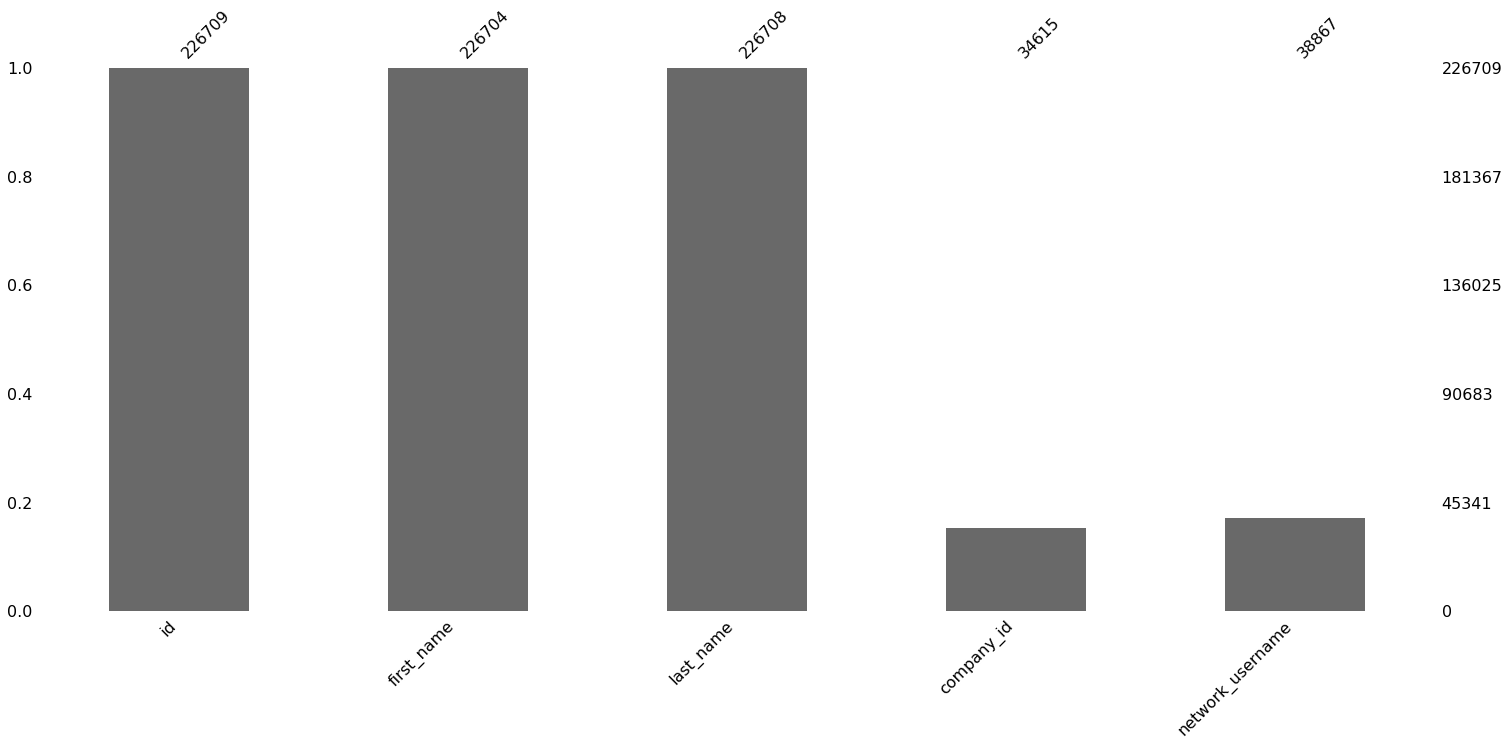

In [19]:
msno.bar(people)

<AxesSubplot:>

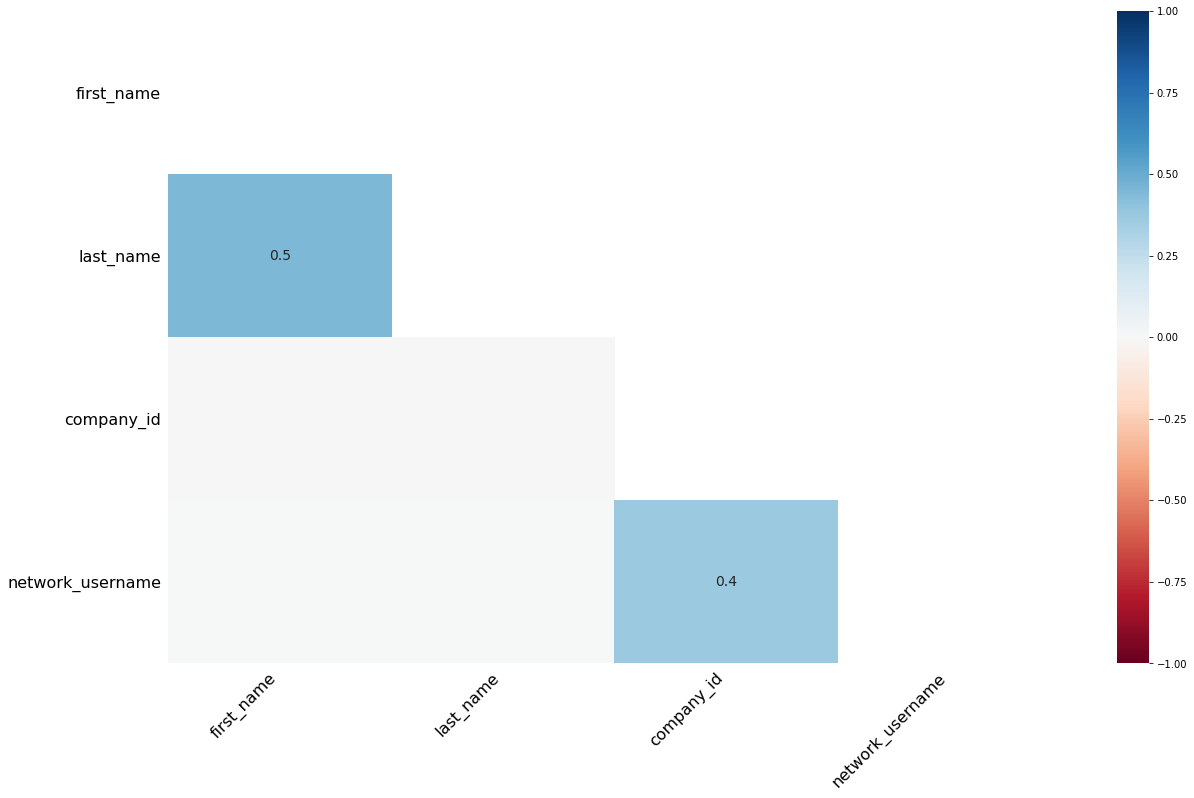

In [20]:
msno.heatmap(people)

In [21]:
# Поменяем тип столбца acquired_at датасета acquisition:
acquisition['acquired_at'] = acquisition['acquired_at'].astype('datetime64[ns]')

# Проверка:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [22]:
# Поменяем тип столбцов founded_at, closed_at, funded_at датасета company_and_rounds:
company_and_rounds[['founded_at', 'closed_at', 'funded_at']] = company_and_rounds[['founded_at', 'closed_at', 'funded_at']].astype('datetime64[ns]')

# Проверка:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [23]:
# Поменяем тип столбца graduated_at датасета education:
education['graduated_at'] = education['graduated_at'].astype('datetime64[ns]')

# Проверка:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   institution   109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [24]:
# Поменяем тип столбца founded_at датасета fund: 
fund['founded_at'] = fund['founded_at'].astype('datetime64[ns]')

# Проверка:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB



* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта. 

Пропусков в данных много, это может быть препятствием для решения задач, однако в ходе работы будет проведен анализ и обработка всех датафреймов и данных в них, в результате чего задачи будут решены

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [25]:
company_and_rounds.sample(10)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
184351,56015.0,Di Franco Media,NaN,operating,NaT,NaT,difrancomedia.com,daviddifranco,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
84992,222569.0,Feedster,NaN,closed,NaT,2007-11-01,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
207722,78255.0,Airway Therapeutics,biotech,operating,NaT,NaT,airwaytherapeutics.com,NaN,USA,0.0,1.0,500000.0,0.0,23374.0,78255.0,2011-06-06,angel,500000.0,0.0,0.0,1.0,1.0
13243,146548.0,Verivo Software,enterprise,operating,1998-01-01,NaT,verivo.com,verivosoftware,USA,0.0,2.0,21000000.0,1.0,27488.0,146548.0,2012-01-10,venture,17000000.0,0.0,3.0,0.0,1.0
5620,13279.0,Brainflare,web,operating,NaT,NaT,brainflare.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
63923,200613.0,Rexon Limited,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
97382,234709.0,Code Whale,software,operating,2013-02-01,NaT,poeditor.com,POEditor,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
138971,273097.0,Bridge Languages,other,operating,NaT,NaT,bridgelanguages.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5129,1301.0,StreetFire,web,acquired,2004-06-01,NaT,streetfire.net,streetfire,USA,0.0,2.0,7900000.0,2.0,922.0,1301.0,2007-09-01,series-a,6100000.0,0.0,1.0,0.0,1.0
14643,148323.0,BugginMe,other,operating,NaT,NaT,buggin.me,Itsbugginme,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Для решения сначала нужно создать новый столбец "founded_year"
# в котором будут только годы инвестирований, это нужно для дальнейшей группировки по годам 


# Создаем новый столбец:
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.to_period('Y')

# Проверка нового столбца:
display(company_and_rounds.sample(7))

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
108126,24457.0,Barzone,NaN,operating,NaT,NaT,barzone.co.uk,NaN,GBR,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
183361,55145.0,Spectrum Interactive,public_relations,operating,NaT,NaT,spectruminteractive.co.uk,SI_Spectrum,GBR,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
112198,248353.0,Kludi GmbH & Co. KG,ecommerce,operating,1926-01-01,NaT,kludi.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
140897,274918.0,Falcon Microsystems,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
153315,29484.0,serendipity videography,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
28109,163507.0,Legrand Spa,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
145660,279485.0,Pierre Audoin Consultants,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [27]:
# Создаем сводную таблицу:
pivot_rounds = pd.pivot_table(company_and_rounds,
                              index='funded_year',
                              values='raised_amount',
                              aggfunc=['median', 'count']
)


# Проверка:
pivot_rounds.info()

display(pivot_rounds)

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 30 entries, 1960 to 2013
Freq: A-DEC
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (median, raised_amount)  30 non-null     float64
 1   (count, raised_amount)   30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


,median,count
,raised_amount,raised_amount
funded_year,,
1960,0.0,9
1973,0.0,1
1974,0.0,2
1984,41000.0,3
1985,0.0,1
1987,1250000.0,2
1989,15000.0,1
1990,1000000.0,1


In [28]:
# Отберем те годы, где было >50 раундов:
pivot_rounds = pivot_rounds.loc[pivot_rounds[('count', 'raised_amount')] > 50 ]

# Приведем строки со ср значением к читаемому формату:
pd.options.display.float_format = '{: .2f}'.format 

display(pivot_rounds)

,median,count
,raised_amount,raised_amount
funded_year,,
1999,2000000.00,76
2000,4200000.00,125
2001,3000000.00,96
2002,4200000.00,116
2003,3000000.00,159
2004,5000000.00,291
2005,5500000.00,1633
2006,5000000.00,2436


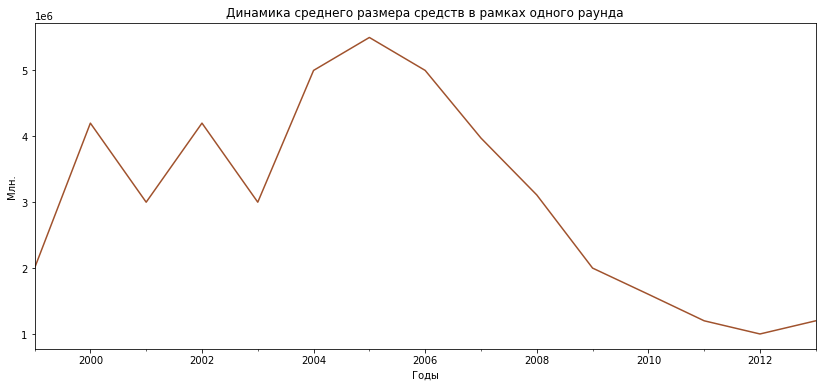

In [29]:
# Сбросим индексы и сделаем годы столбцом:
pivot_rounds = pivot_rounds.reset_index()

# Визуализируем:
pivot_rounds.plot(kind='line', 
                  x='funded_year', 
                  y=('median', 'raised_amount'),
                  color = 'sienna',
                  legend=False, 
                  figsize=(14, 6))
plt.title('Динамика среднего размера средств в рамках одного раунда')
plt.xlabel('Годы')
plt.ylabel('Млн.')
plt.show()

In [30]:
# Отсортируем для точного вывода:
pivot_rounds.sort_values(by=('median', 'raised_amount'))

,funded_year,median,count
,,raised_amount,raised_amount
13,2012,1000000.00,9970
12,2011,1200000.00,9204
14,2013,1200000.00,11072
11,2010,1602500.00,6221
0,1999,2000000.00,76
10,2009,2000000.00,4151
2,2001,3000000.00,96
4,2003,3000000.00,159
9,2008,3110000.00,3774


Видим кривую, показывающую колебания от года к году:
+ Максимальное среднее количество средств в рамках одного раунда было собрано в 2005 году (5.5 млн.)	
+ В 2012 году было минимальное количество собранных средств (1 млн.)
+ В 2013 общее количество раундов было наибольшим за весь период (11072 раундов), при этом собранные средства близки к минимуму (1.2 млн.). Видим, что с 2010 года наблюдается тенденция снижения сумм инвестирования и увеличения при этом раундов финансирования. Одной из причин может быть экономический аспект - показатель дефляции в США с 2005 по 2013 увеличился (судя по официальным данным), а значит покупательная способность доллара также увеличилась


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп. **ОК**

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`. **ОК**

Итак, я пришла к выводу, что нужно соединять все 3 таблицы, поскольку в каждой из таблиц содержится инфо, которое может помочь понять, есть ли у сотрудника образование. Т.е. получается, что ключевыми критериями являются следующие:
+ institution
+ graduated_at
+ degree_type
+ subject

In [31]:
# Соединим сначала 2 датасета people и education:
ep_merged = education.merge(people, left_on='person_id', right_on='id', how='right')

ep_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              109056 non-null  float64       
 1   person_id         109056 non-null  float64       
 2   institution       109002 non-null  object        
 3   graduated_at      57691 non-null   datetime64[ns]
 4   id_y              267694 non-null  int64         
 5   first_name        267689 non-null  object        
 6   last_name         267693 non-null  object        
 7   company_id        44789 non-null   float64       
 8   network_username  50775 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


Далее для соединения ep_merged с degrees надо очистить столбец `object_id` от первых лишних символов, тк они будут мешать присоединению датасетов

In [32]:
# Очистим столбец object_id от первых двух символов (p:) и поменяем его тип:
degrees['object_id'] = degrees['object_id'].map(lambda x: x[2:])
degrees['object_id'] = degrees['object_id'].astype('int64')

# Проверка:
degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [33]:
# Теперь можно соединить датасеты:
epd_merged = ep_merged.merge(degrees, left_on='id_y', right_on='object_id', how='left')

epd_merged.info()
epd_merged.sample(5) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              212198 non-null  float64       
 1   person_id         212198 non-null  float64       
 2   institution       212109 non-null  object        
 3   graduated_at      113991 non-null  datetime64[ns]
 4   id_y              370836 non-null  int64         
 5   first_name        370831 non-null  object        
 6   last_name         370835 non-null  object        
 7   company_id        70869 non-null   float64       
 8   network_username  81529 non-null   object        
 9   id                212198 non-null  float64       
 10  object_id         212198 non-null  float64       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

,id_x,person_id,institution,graduated_at,id_y,first_name,last_name,company_id,network_username,id,object_id,degree_type,subject
162913,61190.00,216482.00,"Duke University, Fuqua School of Business",NaT,216482,Brett,Flinchum,NaN,NaN,61189.00,216482.00,BS,Economics
207592,83312.00,236866.00,University of Tennessee,NaT,236866,Bill,Alvord,NaN,NaN,83312.00,236866.00,MS,Nuclear Engineering
331888,79099.00,70527.00,University of Notre Dame,NaT,70527,Mark,McGough,NaN,NaN,79099.00,70527.00,BS,Mechanical Engineering
247625,100853.00,258707.00,Marquette University Law School,1985-01-01,258707,Rick,M. Schweiger,NaN,NaN,100854.00,258707.00,Masters of Law,Taxation
123376,40877.00,195049.00,LDS Business College,2006-01-01,195049,Jeffrey,Harmon,NaN,JeffreyHarmon,40875.00,195049.00,NaN,International Business


In [34]:
# Для удобства переименуем некоторые столбцы:
epd_merged = epd_merged.rename(columns={'id_x' : 'education_id',
                               'id_y' : 'people_id'})

epd_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   education_id      212198 non-null  float64       
 1   person_id         212198 non-null  float64       
 2   institution       212109 non-null  object        
 3   graduated_at      113991 non-null  datetime64[ns]
 4   people_id         370836 non-null  int64         
 5   first_name        370831 non-null  object        
 6   last_name         370835 non-null  object        
 7   company_id        70869 non-null   float64       
 8   network_username  81529 non-null   object        
 9   id                212198 non-null  float64       
 10  object_id         212198 non-null  float64       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

Теперь надо проанализировать соединенный датасет и обработать его для дальнешего анализа. Перейдем к дубликатам

In [35]:
# Проверим дубликаты в people_id
epd_merged.duplicated(subset=['people_id']).sum()

144128

Получается, если есть дубли по people_id, то это действительно задубленные строки. В любом случае их нужно удалить, тк это сильно искажает данные (вариант что люди могли получить 2 образования возможен, но для данной задачи это не играет роли, нам достаточно просто факта образования у сотрудника, а уже сколько их у него - здесь неважно)

In [36]:
epd_merged.loc[epd_merged['company_id']==1]

,education_id,person_id,institution,graduated_at,people_id,first_name,last_name,company_id,network_username,id,object_id,degree_type,subject
5793,NaN,NaN,NaN,NaT,104800,Alex,Weinstein,1.00,alexweinstein,NaN,NaN,NaN,NaN
271005,706.00,3.00,Washington University in St Louis,NaT,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,BBA,NaN
271006,706.00,3.00,Washington University in St Louis,NaT,3,Kevin,Flaherty,1.00,NaN,707.00,3.00,MBA,NaN
271007,707.00,3.00,Indiana University,NaT,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,BBA,NaN
271008,707.00,3.00,Indiana University,NaT,3,Kevin,Flaherty,1.00,NaN,707.00,3.00,MBA,NaN


In [37]:
epd_merged = epd_merged.drop_duplicates(subset=['people_id'])

In [38]:
# Проверим абсолютное количество пропусков в каждом столбце
epd_merged.isna().sum().sort_values(ascending=False)

company_id          192094
graduated_at        190321
network_username    187841
subject             175900
degree_type         165307
institution         158677
education_id        158637
person_id           158637
id                  158637
object_id           158637
first_name               5
last_name                1
people_id                0
dtype: int64

In [39]:
# Проверим относительное количество пропусков в процентах
round((epd_merged.isna().sum() / len(epd_merged)  * 100),2).sort_values(ascending=False)

company_id          84.73
graduated_at        83.95
network_username    82.86
subject             77.59
degree_type         72.92
institution         69.99
education_id        69.97
person_id           69.97
id                  69.97
object_id           69.97
people_id            0.00
first_name           0.00
last_name            0.00
dtype: float64

Обрабатаем некоторые из них для дальнейшего анализа

In [40]:
# Сделаем "заглушку" для пропусков
epd_merged['company_id'] = epd_merged['company_id'].fillna(-1)
epd_merged['institution'] = epd_merged['institution'].fillna(-1)
epd_merged['graduated_at'] = epd_merged['graduated_at'].fillna(-1)
epd_merged['degree_type'] = epd_merged['degree_type'].fillna(-1)
epd_merged['subject'] = epd_merged['subject'].fillna(-1)

Для того, чтобы понять, есть ли образование у сотрудника, нужно пройтись по 4 ключевым столбцам:
+ institution
+ graduated_at
+ degree_type
+ subject


То есть если хотя бы в 1 из этих столбцов будет какое-то инфо -> образование у сотрудника есть. Чтобы это определить создадим новый столбец `educated`, который будет содержать True если хоть в одном из вышеперечисленных столбцов будут данные и False если нет ни в одном

In [41]:
epd_merged['educated'] = (epd_merged.institution != -1) | (epd_merged.graduated_at != -1) | (epd_merged.degree_type != -1)| (epd_merged.subject != -1)

epd_merged.sample(15)

,education_id,person_id,institution,graduated_at,people_id,first_name,last_name,company_id,network_username,id,object_id,degree_type,subject,educated
294647,NaN,NaN,-1,-1,45676,Eduardo,Bravo,-1.00,NaN,NaN,NaN,-1,-1,False
45552,NaN,NaN,-1,-1,140744,Wordpress Outsourcin,India,-1.00,NaN,NaN,NaN,-1,-1,False
78355,24558.00,167048.00,University of Vermont,1996-01-01 00:00:00,167048,Chris,Homer,81558.00,jobsbostontech,24558.00,167048.00,BS,Business Admin,True
267241,NaN,NaN,-1,-1,27296,Nicki,McClusky,-1.00,NaN,NaN,NaN,-1,-1,False
226577,91284.00,246851.00,Chelyabinsk State University,-1,246851,Michael,Ioffe,-1.00,NaN,91284.00,246851.00,MS,Robotics System,True
189512,NaN,NaN,-1,-1,229013,Haro,Hartounian,-1.00,NaN,NaN,NaN,-1,-1,False
232568,NaN,NaN,-1,-1,250154,Shuen,Chi Lo,-1.00,NaN,NaN,NaN,-1,-1,False
171380,64759.00,221332.00,Université de Paris II,1992-01-01 00:00:00,221332,Anne,Gabrielle Heilbronner,-1.00,NaN,64759.00,221332.00,DEA,Droit public,True
283105,NaN,NaN,-1,-1,37801,Brendan,Gill,-1.00,NaN,NaN,NaN,-1,-1,False
370437,NaN,NaN,-1,-1,99653,Evgeny,Zhilinsky,-1.00,NaN,NaN,NaN,-1,-1,False


In [42]:
# Создадим таблицу, в которой будет количество сотрудников всего и количество сотрудников с образованием
df = epd_merged.groupby('company_id')['educated'].agg(['count', 'sum'])
display(df)

,count,sum
company_id,,
-1.00,192094,49605
1.00,2,1
2.00,1,1
3.00,3,2
4.00,13,12
...,...,...
285897.00,2,2
285953.00,1,0
285972.00,2,1


In [43]:
# Сбросим индексы
df.reset_index()

# Найдем долю работников с образованием и без от общего числа сотрудников 
df['educated_share'] = df['sum'] / df['count'] * 100
df['not_educated_share'] = 100 - ( df['sum'] / df['count'] * 100 )
display(df)

,count,sum,educated_share,not_educated_share
company_id,,,,
-1.00,192094,49605,25.82,74.18
1.00,2,1,50.00,50.00
2.00,1,1,100.00,0.00
3.00,3,2,66.67,33.33
4.00,13,12,92.31,7.69
...,...,...,...,...
285897.00,2,2,100.00,0.00
285953.00,1,0,0.00,100.00
285972.00,2,1,50.00,50.00


In [44]:
df.groupby('count')['count'].count()

count
1         18116
2          2709
3           921
4           450
5           237
6           138
7           100
8            59
9            46
10           25
11           30
12           16
13           17
14            8
15            3
16            4
17            5
18            3
19            3
20            3
21            2
22            2
23            3
25            2
26            1
29            2
31            1
32            1
35            1
36            1
39            1
47            1
48            1
51            1
56            2
61            1
63            1
72            1
138           1
150           1
244           1
192094        1
Name: count, dtype: int64

Исходя из данных выше решено разделить компании на 4 группы по количеству сотрудников. А именно до 10, до 20, до 50 и до 250 сотрудников

In [45]:
df['company_group'] = pd.cut(df['count'], bins=[0, 1, 2, 3, 6, 10, 250], labels=['1 сотрудник', '2 сотрудника', '3 сотрудника', '4-6 сотрудников', '7-10 сотрудников', 'более 10 сотрудников'])

display(df.sample(10))

,count,sum,educated_share,not_educated_share,company_group
company_id,,,,,
16658.00,1,1,100.00,0.00,1 сотрудник
168032.00,1,1,100.00,0.00,1 сотрудник
284061.00,1,0,0.00,100.00,1 сотрудник
63515.00,1,1,100.00,0.00,1 сотрудник
2605.00,4,4,100.00,0.00,4-6 сотрудников
144352.00,1,0,0.00,100.00,1 сотрудник
7628.00,1,1,100.00,0.00,1 сотрудник
265321.00,1,1,100.00,0.00,1 сотрудник
81795.00,1,1,100.00,0.00,1 сотрудник


company_group
1 сотрудник             46.26
2 сотрудника            46.60
3 сотрудника            48.68
4-6 сотрудников         50.20
7-10 сотрудников        53.57
более 10 сотрудников    42.82
Name: not_educated_share, dtype: float64

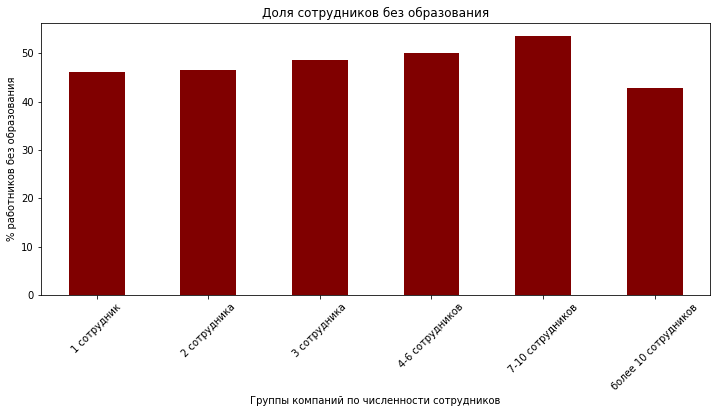

In [46]:
df_final = df.groupby('company_group')['not_educated_share'].mean()
display(df_final)

df_final.plot(kind='bar', 
              title='Доля сотрудников без образования', 
              xlabel='Группы компаний по численности сотрудников', 
              ylabel='% работников без образования', 
              rot=45, color='maroon',
              figsize=(12,5)
             );

По итогу большого анализа сотрудников с образованием видно следующее: 

Больше всего людей без образования в стартапах, где около 7-10 человек (53%). Это можно объяснить гибкостью в требованиях (в небольших компаниях часто не обращают внимания на дипломы). 

Однако в стартапах, где сотрудников еще меньше (до 5-6), процент людей без образования ниже. Возможно, это связано с тем, что при маленьком кадровом составе четко выбираются квалифицированные сотрудники (т.е. когда весь состав это 3-4 человека, важно, чтобы у каждого было образование, чего не скажешь когда в составе около 7-10 человек)

В более крупных компаниях (от 10 и более сотрудников), процент людей без образования еще ниже (42%). Это можно объяснить строгими требованиями к сотрудникам (четкая кадровая политика нанимать людей с образованием), а также конкуренцией за квалифицированных сотрудников (т.е. возможность набирать болле професиональных сотрудников, тк крупные компании часто могут предложить условия лучше)

### 2.3. Объединять или не объединять — вот в чём вопрос **ОК**

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто. **ОК**

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных. **ОК**

Столбец `network_username` встречается в 3 таблицах:
+ company_and_rounds
+ people
+ fund *(однако эта таблица не требуется для выполнения проекта, поэтому в силу нехватки времени пересечения тут проверять не будем)*

Несмотря на то, что судя по описанию это вообще разные столбцы, никак не связанные по смыслу, надо все равно проверить их на "одинаковость". Для того чтобы понять, можно ли соединять по этому столбцу, нужно разобраться, встречаются ли значения из одной таблицы в другой. Воспользуемся методом intersection()

In [47]:
# Проверим пересечения в таблице company_and_rounds и people по столбцу network_username
set1 = set(company_and_rounds['network_username'])
set2 = set(people['network_username'])

set_final = set1.intersection(set2)
display(set_final)

{nan,
 'mygenieinc',
 'karpantschof',
 'WideVisionTech',
 'thawesomeboston',
 'bwentertainment',
 'arthurmonnet',
 'MardenEdwards',
 'QueenieDress',
 'ashishpatel_com',
 'MonthlyMobiles',
 'randolf',
 'tfmontague',
 'exoprise',
 'sportroops',
 'illumemag',
 'avggroup',
 'quickcue',
 'pinaddon',
 'Miproto',
 'searchrpm',
 'gmrweb123',
 'WildMirene',
 'Questechie',
 'Addictd2Success',
 'vozio',
 'popnewswire',
 'FastSpring',
 'jobsbostontech',
 'purevpn',
 'yourdailytask',
 'DeliverySolNW',
 'teespygolf',
 'MELT_MEDIA',
 'swarmiq_tweets',
 'emobisoft',
 'viralseo',
 'plus__now',
 'tuitionworldwid',
 'personetics',
 'antonejohnson',
 'grumomedia',
 'ceodatemyfamily',
 'gr',
 '36kr',
 'LearnOnEnglish',
 'AbsoluteVariety',
 'bizzduniya',
 'bradharrison1',
 'amhnews',
 'BariatricPal',
 'web9x',
 'ecoemplois',
 'Biz_BT_Intl',
 'inspectlet',
 '4thaspect',
 'creativemomentu',
 'aimmobil',
 'guestblogit',
 'textwithdextr',
 'manageyourtime',
 'mikemoradi',
 'TLOTL',
 'koshikabio',
 'benchbucket'

In [48]:
# Найдем количество элементов в списке
len(set_final)

2200

Итого у нас получается, что в двух таблицах (`company_and_rounds` и `people`) всего 2200 повторяющихся элементов. Это очень маленькое количество значений для соединения датасетов (всего лишь 0.009% от количества строк датасетов). Если объединять таблицы по этому столбцу, то у нас появится еще больше пропусков (в случае с outer join) или же урежется большая доля данных (в случае с inner join). Ни тот, ни другой случай не поможет нам в анализе, а наоборот - испортит данные.

Оценка возможности соединения датасетов по `network_username` проведена - данные соединять по столбцу не нужно.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Проанализируем датасет company_and_rounds подробнее

In [49]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [50]:
company_and_rounds.sample(10)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
98992,236142.00,UralChem,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
99616,236707.00,Firmzen,software,operating,2012-08-01,NaT,firmzen.com,firmzen,IND,0.00,0.00,0.00,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
164675,39354.00,Advanced ICU Care,medical,operating,2004-01-01,NaT,icumedicine.com,NaN,USA,0.00,2.00,10000000.00,1.00,11001.00,39354.00,2010-01-06,series-c+,2000000.00,0.00,0.00,0.00,1.00,2010
114984,250801.00,Kedisoft,games_video,operating,NaT,NaT,kedisoft.com,kedisoft,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
94098,231557.00,WedWu,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
63756,200471.00,Cosmetic Surgery Institute,other,operating,NaT,NaT,cosmeticplasticsurgery.in,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
30189,166026.00,Backlight.org,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
123760,258644.00,Digitilus,games_video,operating,2011-06-29,NaT,digitilus.com,AlSkyjacker,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
212309,83209.00,Fanzy,enterprise,operating,2011-02-01,NaT,fanzy.com,fanzy,USA,0.00,4.00,1500000.00,2.00,32289.00,83209.00,2012-09-01,other,130000.00,0.00,0.00,0.00,0.00,2012
151062,284674.00,NorsePayments,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Итак, что мы имеем:
+ дублирующиеся столбцы, но написанные по-разному (id компании и суммы финансирования)
+ одинаково большое количество пропусков, которые начинаются со столбца `funding_round_id` включительно
+ слова заказчика о том, что данные раньше хранились иначе

Из всего вышеперечисленного можно сделать вывод, что это две разные смердженные таблицы, которые объединили с помощью outer джоина, вследсвтие чего получили огромное количество пропусков. Это можно исправить, разделив исходник на 2 таблицы - `company_df` (здесь инфо о компаниях, числе раундов и сумме финансирования) и `rounds_df` (здесь более детализированная информация про раунды)

In [51]:
# Выведем все столбцы исходного датасета и отберем нужные для разделения
display(company_and_rounds.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_year'],
      dtype='object')

In [52]:
col = ['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']

# Создаем первую таблицу company_df
company_df = company_and_rounds[col]

# Проверка
company_df.info()
display(company_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Проверим на наличие полных дубликатов
company_df.duplicated().sum()

21220

In [54]:
# Удалим дубликаты
company_df = company_df.drop_duplicates()

In [55]:
# Удалим пропуски, если они есть во всех столбцах
company_df.dropna(how='all')

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
5,10000.00,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.00,0.00,0.00,0.00
6,10001.00,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217462,183352.00,Mattress Source,NaN,operating,NaT,NaT,mattresssourcestl.com,network,NaN,0.00,0.00,0.00,0.00
217463,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00
217467,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00
217468,174536.00,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.00,0.00,0.00,0.00


Итак, получили новый "очищенный" датасет `company_df`, в котором содержится инфо о компаниях и раундах финансирования.
Сделаем все то же самое для второго датасета `rounds_df`, хранящего детальное инфо о раундах

In [56]:
# Создадим новый датасет
col_2 = ['funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round']

rounds_df = company_and_rounds[col_2]

# Проверка
rounds_df.info()
display(rounds_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00
1,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00
2,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
217769,56454.00,282847.00,2011-01-31,other,5500000.00,0.00,0.00,1.00,1.00
217770,56542.00,55477.00,2011-01-13,venture,10633300.00,0.00,0.00,0.00,1.00
217771,56543.00,55477.00,2012-05-31,venture,2125720.00,0.00,0.00,1.00,0.00
217772,56928.00,283492.00,2013-12-03,venture,3602480.00,0.00,5.00,1.00,1.00


In [57]:
# Проверим на наличие полных дубликатов
rounds_df.duplicated().sum()

164845

In [58]:
# Удалим дубликаты
rounds_df = rounds_df.drop_duplicates()

In [59]:
# Удалим пропуски, если они есть во всех столбцах
rounds_df.dropna(how='all')

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00
1,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00
2,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00
15,1644.00,1001.00,2008-02-26,series-a,5000000.00,0.00,3.00,1.00,1.00
20,6682.00,10014.00,2008-09-01,angel,0.00,0.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...
217769,56454.00,282847.00,2011-01-31,other,5500000.00,0.00,0.00,1.00,1.00
217770,56542.00,55477.00,2011-01-13,venture,10633300.00,0.00,0.00,0.00,1.00
217771,56543.00,55477.00,2012-05-31,venture,2125720.00,0.00,0.00,1.00,0.00
217772,56928.00,283492.00,2013-12-03,venture,3602480.00,0.00,5.00,1.00,1.00


Готово! Получили 2 раздельных и очищенных от дубликатов датасета - company_df и rounds_df

In [60]:
a = rounds_df['raised_amount'].sum()
b = company_df['funding_total'].sum()
print(a-b)

7575085037.0



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных 

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

Так как на предыдущих этапах датасет company_and_rounds был обработан и разделен на две части, будем работать только с той, в которой хранятся необходимые для задачи данные, т.е. с `company_df`.

Для задачи нужно выполнение ОДНОГО из условий:
+ `funding_rounds` или `investment_rounds` > 0
+ `status` = `acquired`

In [61]:
# Отфильтруем датасет под запрос заказчика:
filtered_df = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired') ]
display(filtered_df)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
15,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00
20,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.00,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,10000000.00,0.00
217459,142181.00,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,500000.00,1.00
217463,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00
217467,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00


In [62]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

Готово! Получили таблицу, с которой и будет проводиться вся дальнейшая работа.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений? 

In [63]:
filtered_df['funding_total'].describe()

count         40747.00
mean       10135609.64
std        56464359.98
min               0.00
25%               0.00
50%          600000.00
75%         5650650.00
max      5700000000.00
Name: funding_total, dtype: float64

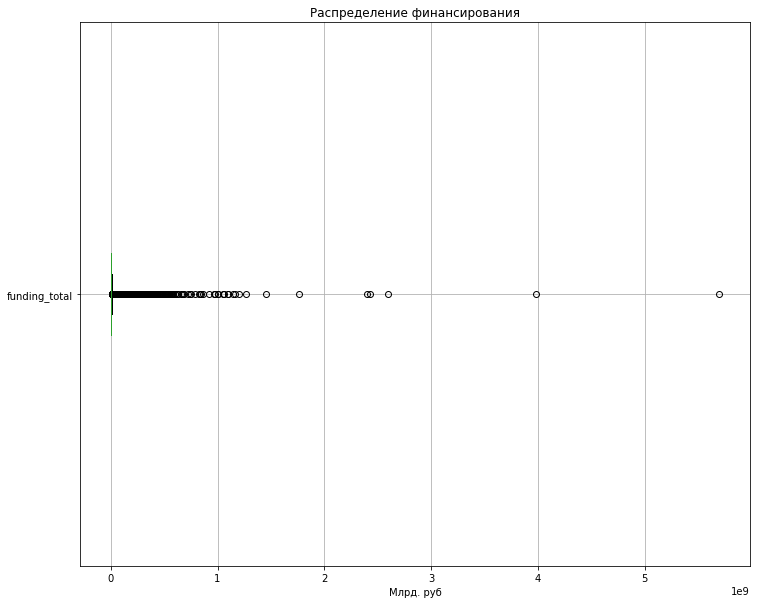

In [64]:
# Строим "ящик с усами" с выбросами для оценки общего финансирования:
boxplot = filtered_df.boxplot(column='funding_total',
                              vert=False,
                             figsize=(12, 10))
boxplot.set_title('Распределение финансирования')
boxplot.set_xlabel('Млрд. руб')
plt.show() 

Видим, что выбросов очень много. Теперь построим тот же ящик но с отключенными выбросами

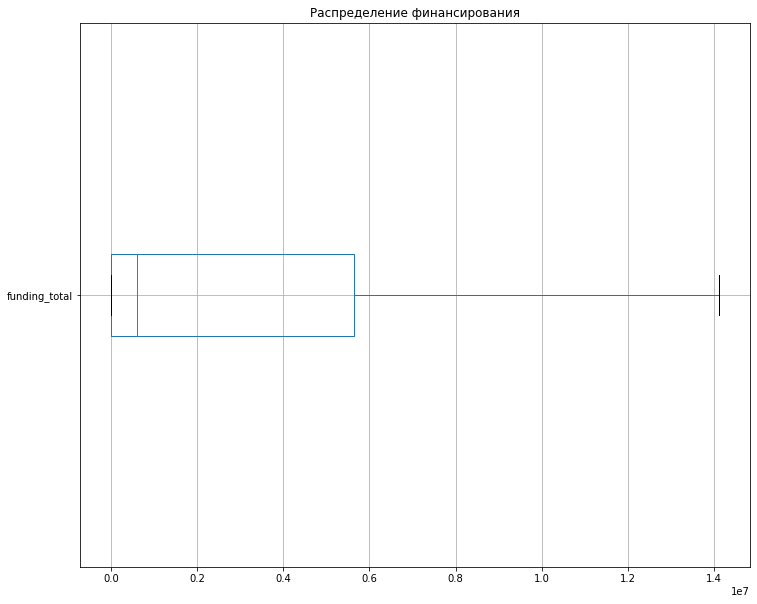

In [65]:
# Строим "ящик с усами" без выбросов для оценки общего финансирования:
boxplot = filtered_df.boxplot(column='funding_total',
                              vert=False,
                             figsize=(12, 10),
                             showfliers=False)
boxplot.set_title('Распределение финансирования')
plt.show() 

In [66]:
# Проверим, сколько выбросов со сзначением 0 
total_0 = filtered_df['funding_total']==0
display(total_0.sum())

12873

In [67]:
# Проанализируем выбросы в сторону больщих значений
filtered_df.loc[filtered_df['funding_total'] > 1300000000]

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
5517,13219.00,Clearwire,mobile,acquired,2003-10-01,NaT,clearwire.com,NaN,USA,0.00,4.00,5700000000.00,2.00
88129,22568.00,Solyndra,manufacturing,operating,2005-01-01,NaT,solyndra.com,SolyndraCorp,USA,0.00,9.00,1765500000.00,3.00
106151,242735.00,sigmacare,health,operating,2005-01-01,NaT,sigmacare.com,SigmaCareEHR,USA,0.00,1.00,2600000000.00,0.00
175686,4843.00,"Verizon Communications, Inc.",mobile,ipo,NaT,NaT,verizon.com,NaN,USA,3.00,2.00,3985050000.00,3.00
188342,5951.00,Fisker Automotive,automotive,operating,2008-01-01,NaT,fiskerautomotive.com,FiskerAuto,USA,0.00,9.00,1451000000.00,3.00
193712,64365.00,Carestream,biotech,operating,2007-01-01,NaT,carestream.com,carestream,USA,0.00,1.00,2400000000.00,1.00
217286,5.00,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.00,11.00,2425700000.00,5.00


Тут нужно гуглить, в итоге мы видим, что:
+ Clearwire не получали никаких инвестиций в размере 5.7млрд - это некорректные данные
+ Solyndra действительно получила финансирование на 1.765млрд, это корректно
+ sigmacare не финансировали на 2.6 млрд, это некорретно
+ Verizon Communications, Inc. - нет инфо, скорее всего некорректно
+ Fisker Automotive получали инвестиции на 1.451млрд - корректно
+ Carestream получали инвестиции на сумму 2.4млрд - корректно
+ Socialnet - нет инфо, скорее всего некорректно

В итоге из самых значительных выбросов (а их 7), видим, что 57% из них - это некорректная информация.

Резимируем анализ распределения финансирования:
+ самое типичное значение инвестиций - 0.6 млн 
+ в датасете огромное количество выбросов со значением "0" (32% данных имеют в столбце 'funding_total' это значение), это аномалия, т.е. ошибка в данных
+ медианное значение (600000) меньше среднего значения (10135609). Это значит, что выборка отрицательно искажена (об этом и написано во 2 пункте)
+ сильных положительных выбросов (превыщающих значение 1.3млрд) не так много - 7 компаний, 4 из которых некорректные. Однако они сильно искажают данные, из за чего средние значения и значения квартилей также искажены (анализ `describe)`
+ максимальная сумма инвестиций собрана компанией Carestream в размере 2.4млрд


### 3.3. Куплены забесплатно? 

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. 

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям. 

Для решения задачи нужно соединить данные датасета filtered_df и acquisition, чтобы найти сумму сделки, после чего отфильтровать по условиям задачи:

In [68]:
# Объединим filtered_df и acquisition
free_company = filtered_df.merge(acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')
display(free_company)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00,NaN,NaN,NaN,NaN,NaN,NaT
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00,20.00,377.00,100.00,cash,0.00,2005-05-29
3,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10
4,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.00,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,10000000.00,0.00,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.00,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,500000.00,1.00,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00,NaN,NaN,NaN,NaN,NaN,NaT


In [69]:
# Отфильтрует полученный датасет по заданным условиям
free_company = free_company[(free_company['funding_total'] > 0 ) & ((free_company['price_amount'] == 0) | (free_company['price_amount'] == 1))]
display(free_company)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.00,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.00,2.00,3900000.00,0.00,7024.00,317.00,99.00,NaN,0.00,2010-09-22
40836,9905.00,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,5172350.00,0.00,3381.00,41119.00,9905.00,NaN,0.00,2010-06-24
40840,992.00,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.00,1.00,10000000.00,1.00,9916.00,19182.00,992.00,NaN,0.00,2010-07-02
40854,997.00,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.00,1.00,14500000.00,3.00,9121.00,415.00,997.00,NaN,0.00,2013-07-15


In [70]:
# Проверим на дубли
free_company['company_ID'].duplicated().sum()

25

In [71]:
# Удалим дубли
free_company = free_company.drop_duplicates(subset='company_ID')
display(free_company)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.00,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.00,2.00,3900000.00,0.00,7024.00,317.00,99.00,NaN,0.00,2010-09-22
40836,9905.00,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,5172350.00,0.00,3381.00,41119.00,9905.00,NaN,0.00,2010-06-24
40840,992.00,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.00,1.00,10000000.00,1.00,9916.00,19182.00,992.00,NaN,0.00,2010-07-02
40854,997.00,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.00,1.00,14500000.00,3.00,9121.00,415.00,997.00,NaN,0.00,2013-07-15


Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям 

In [72]:
# Выведем описание столбца funding_total
free_company['funding_total'].describe()

count          1593.00
mean       17989939.46
std       145312235.70
min            3750.00
25%         2000000.00
50%         6000000.00
75%        15400000.00
max      5700000000.00
Name: funding_total, dtype: float64

In [73]:
# Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total
q1 = 2000000
q3 = 15400000
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q1 + 1.5 * iqr

print('Нижняя граница выбросов:')
print(lower_limit)
print('Однако брать за нижнюю нижнюю границу отрицательное число - некорректно, поэтому возьмем за нижнюю границу выбросов минимальное значение:')
print(free_company['funding_total'].min())

print('Верхняя граница выбросов:')
print(upper_limit)

Нижняя граница выбросов:
-18100000.0
Однако брать за нижнюю нижнюю границу отрицательное число - некорректно, поэтому возьмем за нижнюю границу выбросов минимальное значение:
3750.0
Верхняя граница выбросов:
22100000.0


Видим, что выбросы значительно искажают данные, поэтому визуализируем 2 вида ящика с усиками

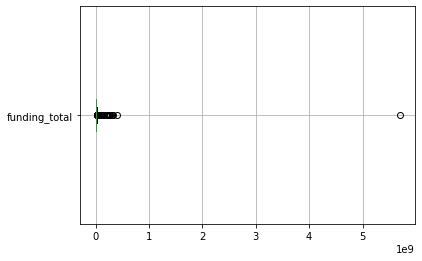

In [74]:
# Строим ящик с усиками
box = free_company.boxplot(column='funding_total',
                          vert=False)

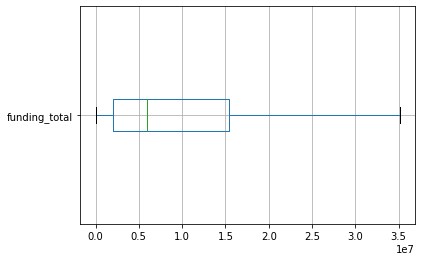

In [75]:
# Строим ящик с усиками без выбросов
box2 = free_company.boxplot(column='funding_total',
                          vert=False,
                           showfliers=False)

Анализируем график без выбросов - видим, что медианное значение около 0.6млн, минимум без учета выбросов - 0.2млн, максимум без учета выбросов 1.5млн руб. 

Это более приближенные к реальности данные, поэтому замена заказчиком нижней и верхней границы будет корректна.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [76]:
filtered_df.sample(10)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
159510,35192.00,Accumulate,mobile,operating,2005-01-01,NaT,accumulate.se,NaN,SWE,0.00,4.00,12050000.00,0.00
97754,235022.00,Cold Plasma Medical Technologies,medical,operating,2012-01-01,NaT,medicalcoldplasma.com,NaN,USA,0.00,5.00,1416160.00,0.00
176473,49100.00,DeerTech,other,acquired,2003-01-01,NaT,deertechusa.com,NaN,USA,0.00,1.00,4000000.00,0.00
200571,70716.00,Code Start,ecommerce,acquired,2010-03-01,NaT,shoppi.jp,shoppi_iPhoneAp,JPN,0.00,0.00,0.00,1.00
103882,240624.00,GBS/CIDP Foundation International,medical,operating,1980-01-01,NaT,gbs-cidp.org,GBSCIDP,USA,1.00,0.00,0.00,0.00
107109,243604.00,INCOQNITO,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.00,0.00,0.00,1.00
205626,75918.00,ReplyBuy,web,operating,2011-01-03,NaT,replybuy.com,ReplyBuy,USA,0.00,2.00,940000.00,1.00
157412,33039.00,Pantech,mobile,operating,NaT,NaT,pantechusa.com,pantechusa,USA,0.00,1.00,76300000.00,1.00
5614,13275.00,Media River,search,acquired,2001-01-01,NaT,mediariver.com,NaN,USA,0.00,0.00,0.00,0.00
106088,242684.00,gozent,real_estate,operating,2013-05-06,NaT,gozent.com,gozentweet,USA,0.00,1.00,200000.00,0.00


In [77]:
# Найдем типичные суммы финансирования для каждой категории стартапов
median_fund = filtered_df.groupby('category_code')['funding_total'].agg('median').sort_values(ascending=False)
display(median_fund)



category_code
semiconductor       8100000.00
cleantech           6000000.00
medical             5400000.00
nanotech            5115960.00
biotech             4000000.00
security            2024640.00
analytics           2000000.00
network_hosting     2000000.00
manufacturing       1895040.00
enterprise          1617100.00
hardware            1408400.00
finance             1350000.00
automotive          1300000.00
fashion             1200000.00
transportation      1100000.00
health              1000000.00
software            1000000.00
advertising         1000000.00
news                 908014.50
mobile               800000.00
legal                770000.00
hospitality          728007.00
messaging            727250.00
nonprofit            715847.00
search               681350.00
music                650000.00
travel               605750.00
real_estate          605000.00
education            570000.00
games_video          503000.00
ecommerce            486000.00
photo_video          4700

In [78]:
# Найдем размах сумм финансирования для каждой категории стартапов
std_fund = filtered_df.groupby('category_code')['funding_total'].std().sort_values(ascending=False)
display(std_fund)

category_code
automotive          183204652.28
mobile              145979243.97
social              111475778.26
health              105034086.46
nanotech             95961092.03
manufacturing        93045301.29
cleantech            92155504.52
network_hosting      62888383.61
public_relations     58402709.88
biotech              54657912.81
transportation       53727781.73
hardware             50787384.29
news                 50547176.64
government           48658097.01
travel               48067844.25
ecommerce            47577032.26
security             44979657.17
real_estate          43852504.54
music                43481888.93
games_video          42392640.79
semiconductor        39924605.06
fashion              39689171.46
enterprise           36622224.08
education            36609389.60
hospitality          36596532.99
finance              35946259.53
medical              33549832.82
web                  33438895.88
search               32554132.10
analytics            28934650

Для анализа стартапов, которые будут наиболее привлекательными для крупных инвесторов, отберем топ-10 категорий компаний с наибольшей типичной суммой финансирования и топ-10 категорий с большим размахом в суммах финансирования. 

In [79]:
display(median_fund.head(10))

category_code
semiconductor      8100000.00
cleantech          6000000.00
medical            5400000.00
nanotech           5115960.00
biotech            4000000.00
security           2024640.00
analytics          2000000.00
network_hosting    2000000.00
manufacturing      1895040.00
enterprise         1617100.00
Name: funding_total, dtype: float64

In [80]:
display(std_fund.head(10))

category_code
automotive          183204652.28
mobile              145979243.97
social              111475778.26
health              105034086.46
nanotech             95961092.03
manufacturing        93045301.29
cleantech            92155504.52
network_hosting      62888383.61
public_relations     58402709.88
biotech              54657912.81
Name: funding_total, dtype: float64

Проанализировав эти данные, найдем категории, которые входят одновременно и в топ с наибольшей суммой финансирования, и в топ с большим размахом - так мы получим высокорисковые категории, привлекательные для крупных инвесторов.

К таким категориям относятся:
+ cleantech
+ nanotech
+ biotech
+ network_hosting
+ manufacturing

Итак, `cleantech`, `nanotech` и `biotech` - категории, связанные с технологиями, снижающими негативное воздействие на среду / исследующими материалы на молекулярном уровне / исследующими биологические системы соответственно. Все 3 категории действительно являются одними из самых перспективных сфер будущего, поскольку благодаря плодам изученияч данных областей можно выявить решения глобальных проблем человечества (улучшение условий окружающей среды, повышения уровня здравоохранения и тд). Большие суммы инвестирования подтверждают это, а большой размах означает, что финансирование поступает как в крупных размерах, так и в небольших размерах

`network_hosting` также является одной из самых востребованных сфер в мире цифровых технологий, поскольку обеспечивает глобальную доступность к инф ресурсам и надежность пользователей Интернета, поэтому категорию можно отнести к привлекательным для инвесторов 

`manufacturing` нишевая область (обозначает промышленность) которая является одной из базовых, поскольку занимается обработкой сырья в готовый продукт. Категория входит в топ самых финансируемых, причем как большими суммами (инвестиции в крупные компании), так и незначительными (финансируются и мелкие компании тоже)


### 3.5. Сколько раундов продержится стартап перед покупкой 

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Несмотря на то, что в задании написано "типичное" значение, более наглядным будет выбор среднего значения количества раундов. Использование медианы на данных, разброс которых невелик, не лучшее решение.

In [81]:
# Построим график среднего количества раундов финансирования в разрезе статусов стартапов
filtered_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

status
ipo          1.93
operating    1.52
closed       1.38
acquired     0.52
Name: funding_rounds, dtype: float64

<AxesSubplot:title={'center':'Cреднее количество раундов финансирования в разрезе статусов стартапов'}, xlabel='Статус стартапа', ylabel='Среднее количество раундов финансирования'>

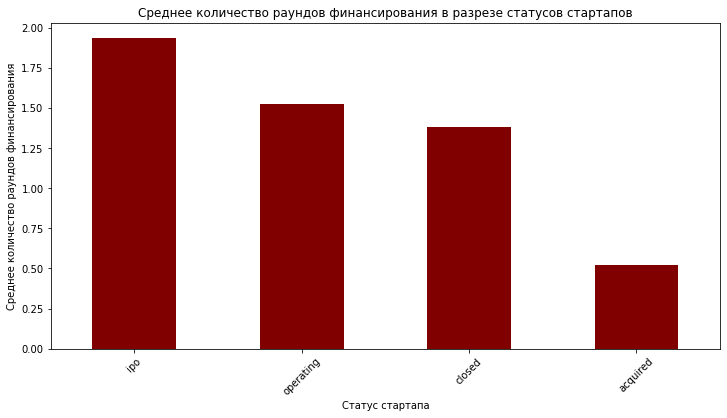

In [82]:
# Построим график среднего количества раундов финансирования в разрезе статусов стартапов
filtered_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                        rot=45,
                                                                                        figsize=(12, 6),
                                                                                        color ='maroon',
                                                                                        title='Cреднее количество раундов финансирования в разрезе статусов стартапов',
                                                                                        xlabel='Статус стартапа',
                                                                                        ylabel='Среднее количество раундов финансирования')

Итак, из графика можно сделать следующие выводы:
+ у стартапов со статусом ipo и operating наибольшее количество раундов финансирования. Высокое количество раундов означает, что стартап проходит через разные этапы развития, привлекает капитал для роста, т.е. стартап готов к долгострочному финансированиюю.
+ у стартапов со статусм closed показатель ср кол-ва раундов 1.38, - это не высокий показатель, который говорит о недостаточном финансировании и вследствие чего - закрытии стартапа
+ у стартапов со статусом acquired наименьшее ср число раундов финансирования (0.5), то есть стартапы полностью выкупаются инвесторами на самых ранних этапах


## Шаг 4. Итоговый вывод и рекомендации

В ходе анализа данных по стартапам была проведена следующая работа:
1) Подробна изучены 6 файлов, содержащих данные о стартапах, компаниях, раундах финансирования, сотрудниках и многого другого: была выведена общая информация, исправлены названия столбцов и их типы, а также были проанализированы пропуски.

2) Данные были предобработаны и было проведено предварительное исследование, которо включало в себя:
    
    2.1) Инфо про Раунды финансирования по годам (создание и анализ сводной таблицы по столбцу raised_amount). Были сделаны следующие выводы:
    - Максимальное среднее количество средств в рамках одного раунда было собрано в 2005 году (5.5 млн.)	
    - В 2012 году было минимальное количество собранных средств (1 млн.)
    - В 2013 общее количество раундов было наибольшим за весь период (11072 раундов), при этом собранные средства близки к минимуму (1.2 млн.). Видим, что с 2010 года наблюдается тенденция снижения сумм инвестирования и увеличения при этом раундов финансирования. Одной из причин может быть экономический аспект - показатель дефляции в США с 2005 по 2013 увеличился (судя по официальным данным), а значит покупательная способность доллара также увеличилась
    
    2.2) Инфо про людей и их образование (соединение 3 таблиц: people, education, degrees и их подробный анализ). Были сделаны следующие выводы:
    - Больше всего людей без образования в стартапах, где около 7-10 человек (53%). Это можно объяснить гибкостью в требованиях (в небольших компаниях часто не обращают внимания на дипломы). 
    - В стартапах, где сотрудников еще меньше (до 5-6), процент людей без образования ниже. Возможно, это связано с тем, что при маленьком кадровом составе четко выбираются квалифицированные сотрудники (т.е. когда весь состав это 3-4 человека, важно, чтобы у каждого было образование, чего не скажешь когда в составе около 7-10 человек)
    - В более крупных компаниях (от 10 и более сотрудников), процент людей без образования еще ниже (42%). Это можно объяснить строгими требованиями к сотрудникам (четкая кадровая политика нанимать людей с образованием), а также конкуренцией за квалифицированных сотрудников (т.е. возможность набирать болле професиональных сотрудников, тк крупные компании часто могут предложить условия лучше)
    
    2.3) Оценка возможности использования столбцов с именем network_username для объединения данных. Был сделан следующий вывод:  данные соединять по столбцу не нужно, поскольку в случае присоединения появится еще больше пропусков (в случае с outer join) или же урежется большая доля данных (в случае с inner join). Ни тот, ни другой случай не поможет нам в анализе, а наоборот - испортит данные.
    
    2.4) Выяснена причина возникновения пропусков в таблице company_and_rounds. Был сделан следующий вывод: таблица company_and_rounds - это две разные таблицы, которые объединили с помощью outer полного, вследсвтие чего получили огромное количество пропусков. Это было исправлено разделением исходника на 2 таблицы - `company_df` (здесь инфо о компаниях, числе раундов и сумме финансирования) и `rounds_df` (здесь более детализированная информация про раунды)
    
    
    
3) Проведен исследовательский анализ таблиц, который включал в себя:
    
    3.1) Объединение данных (были выбраны только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, и те, у которых в колонке status указано acquired). Впослесдствие работа велась с данной объединенной таблицей
    
    3.2) Анализ выбросов, который предполагал анализ визуализацию данных о типичном и выбивающемчя размере общего финансирования для компании. Были сделаны следующие выводы:
    - самое типичное значение инвестиций - 0.6 млн 
    - в датасете огромное количество выбросов со значением "0" (32% данных имеют в столбце funding_total это значение), это аномалия, т.е. ошибка в данных
    - медианное значение (600000) меньше среднего значения (10135609). Это значит, что выборка отрицательно искажена (об этом и написано во 2 пункте)
    - сильных положительных выбросов (превыщающих значение 1.3млрд) не так много - 7 компаний, 4 из которых некорректные. Однако они сильно искажают данные, из за чего средние значения и значения квартилей также искажены (анализ describe)
    - максимальная сумма инвестиций собрана компанией Carestream в размере 2.4млрд
    
    3.3) Исследование компаний, которые были проданы за ноль или за один доллар. Были сделан следующий вывод: выбросов в данных огромное количество, что сильно искажает итоговые выводы, поэтому замена заказчиком нижней и верхней границы будет корректна.
    
    3.4) Выделение категории стартапов, характеризующиеся наибольшими типичными ценами и наибольшим разбросом цен за стартап. Был сделан следующий вывод: к категориям, которые входят одновременно и в топ с наибольшей суммой финансирования, и в топ с большим размахом относятся:
    - cleantech
    - nanotech
    - biotech
    - network_hosting
    - manufacturing
    
    3.5) Построение графика, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Были сделаны следующие выводы:
    - у стартапов со статусом ipo и operating наибольшее количество раундов финансирования. Высокое количество раундов означает, что стартап проходит через разные этапы развития, привлекает капитал для роста, т.е. стартап готов к долгострочному финансированиюю.
    - у стартапов со статусм closed показатель ср кол-ва раундов 1.38, - это не высокий показатель, который говорит о недостаточном финансировании и вследствие чего - закрытии стартапа
    - у стартапов со статусом acquired наименьшее ср число раундов финансирования (0.5), то есть стартапы полностью выкупаются инвесторами на самых ранних этапах
    
    
    
По итогу всей проделанной работы можно утверждать, что предоставленные заказчиком данные для анализа содержат большое количество пропусков, недостающих/некорректных данных, аномальных значений и других проблем, которые могут сильно повлиять на конечные выводы. Была проведена максимально аккуратная обработка и восстановление данных, однако для решения некоторых поставленных задач информации было недостаточно, чтобы дать четкий и однозначный ответ, поэтому некоторые данные были интерпретированы логически самым подходящим образом (стоит предупредить, что интерпретировать неполные данные можно по-разному и соответственно выоводы могут отличаться). 

Финансовая компания, для которой был проведен анализ, может учитывать для принятия решения выводы, приведенные в работе. Однако важно при этом иметь ввиду, что это исторические и неполные сведения, поэтому опираться только на них без критического мышления и понимания работы финансового сектроа - некорректно.